<a href="https://colab.research.google.com/github/novus-afk/BookRecommender/blob/master/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Book Recommendation System



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Mohammed Yahya Ansari

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/novus-afk/BookRecommender

# **Problem Statement**


During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Dataset Loading

In [ ]:
# Load Dataset
book_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Books.csv"
users_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Users.csv"
ratings_url = "https://raw.githubusercontent.com/novus-afk/BookRecommender/master/Ratings.csv"

books = pd.read_csv(book_url)
users = pd.read_csv(users_url)
ratings = pd.read_csv(ratings_url)

<ipython-input-164-11cff33c511d>:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv(book_url)


### Dataset First View

In [ ]:
# Dataset First Look
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
def row_column(data):
  # Checking number of rows and columns of the dataset using shape
  print("Number of rows are: ",data.shape[0])
  print("Number of columns are: ",data.shape[1])
  return data.shape

In [ ]:
row_column(books)

Number of rows are:  271360
Number of columns are:  8


(271360, 8)

In [ ]:
row_column(users)

Number of rows are:  278858
Number of columns are:  3


(278858, 3)

In [ ]:
row_column(ratings)

Number of rows are:  1149780
Number of columns are:  3


(1149780, 3)

### Dataset Information

In [ ]:
# Dataset Info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
books.duplicated().sum()

0

In [ ]:
users.duplicated().sum()

0

In [ ]:
ratings.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
def missing_values(dataframe):
  '''The function will calculate the missing values and present it in a tabular form '''
  # Calculate the number of missing values in each column
  missing_values_count = dataframe.isnull().sum()

  # Calculate the percentage of missing values in each column
  missing_values_percentage = round(dataframe.isnull().mean().mul(100), 2)

  # Create a table containing the number and percentage of missing values
  missing_values_table = pd.concat([missing_values_count, missing_values_percentage], axis=1)
  missing_values_table = missing_values_table.rename(columns={0: 'Count of Missing Values', 1: '[% of Total Value]'})
  
  # Sort the table by the percentage of missing values in descending order
  missing_values_table = missing_values_table.sort_values('[% of Total Value]', ascending=False)

  # Reset the index of the table
  missing_values_table = missing_values_table.reset_index().rename(columns={'index': 'Column Name'})

  return missing_values_table


In [ ]:
# Missing Values/Null Values Count
missing_values(books)

,Column Name,Count of Missing Values,[% of Total Value]
0,ISBN,0,0.0
1,Book-Title,0,0.0
2,Book-Author,1,0.0
3,Year-Of-Publication,0,0.0
4,Publisher,2,0.0
5,Image-URL-S,0,0.0
6,Image-URL-M,0,0.0
7,Image-URL-L,3,0.0


In [ ]:
missing_values(users)

,Column Name,Count of Missing Values,[% of Total Value]
0,Age,110762,39.72
1,User-ID,0,0.00
2,Location,0,0.00


In [ ]:
missing_values(ratings)

,Column Name,Count of Missing Values,[% of Total Value]
0,User-ID,0,0.0
1,ISBN,0,0.0
2,Book-Rating,0,0.0


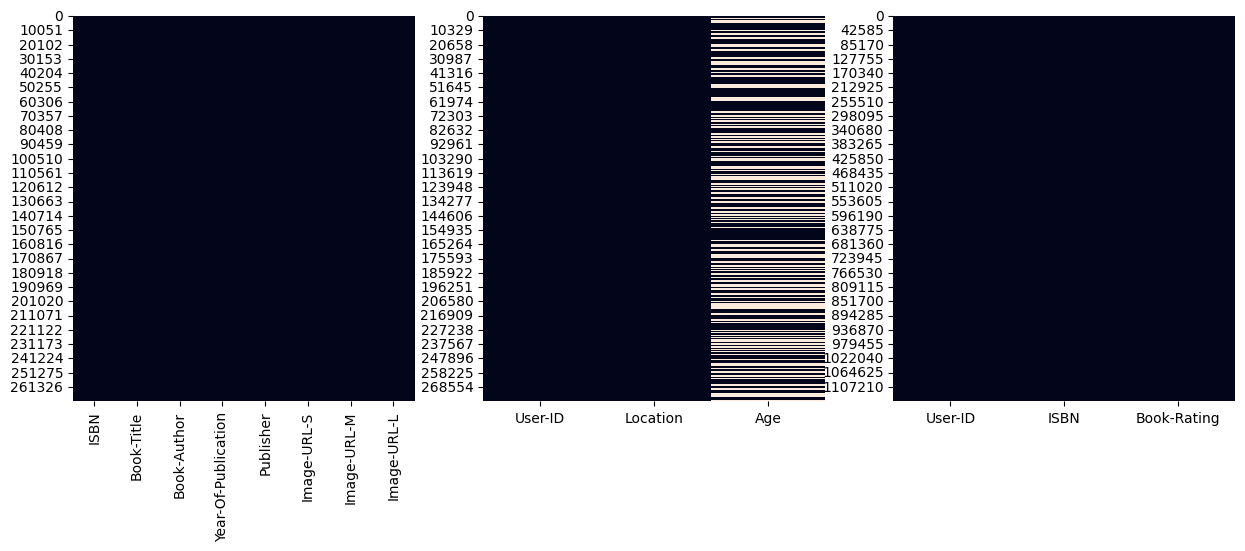

In [ ]:
# Visualizing the missing values
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
sns.heatmap(books.isnull(), cbar=False, ax=ax1)
sns.heatmap(users.isnull(), cbar=False, ax=ax2)
sns.heatmap(ratings.isnull(), cbar=False, ax=ax3)
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
# Dataset Describe
books.describe(include= 'all').round(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
users.describe(include= 'all').round(2)

,User-ID,Location,Age
count,278858.00,278858,168096.00
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50,NaN,34.75
std,80499.52,NaN,14.43
min,1.00,NaN,0.00
25%,69715.25,NaN,24.00
50%,139429.50,NaN,32.00
75%,209143.75,NaN,44.00


In [ ]:
ratings.describe(include= 'all').round(2)

,User-ID,ISBN,Book-Rating
count,1149780.00,1149780,1149780.00
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,140386.40,NaN,2.87
std,80562.28,NaN,3.85
min,2.00,NaN,0.00
25%,70345.00,NaN,0.00
50%,141010.00,NaN,0.00
75%,211028.00,NaN,7.00


### Variables Description 

The book crossing dataset comprises of 3 files.

Books:
- ISBN                   : International standard book number (Invalid ISBNs have already been removed from the dataset)
- Book-Title             : Title of the book
- Book-Author            : Author of the book
- Year-Of-Publication    : Year
- Publisher              : Publisher
- Image-URL-S            : url for small image
- Image-URL-M            : url for medium image
- Image-URL-L            : url for large image

Urls point to amazon website.

Users:

- User-ID          : Anonymized user id (integers)
- Location         : location if unavailable, Null
- Age              : Age of user if unavailable, Null


Ratings:

- User-ID        : Anonymized user id (integers)
- ISBN           : International standard book number
- Book-Rating    : Explicit = rating on a scale of 1 - 10 (higher value denoting higher appreciation) or Implicit expressed by 0

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
def unique_values(data):
  for i in data.columns.tolist():
    print("No. of unique values in",i,"is",data[i].nunique())
  return None

In [ ]:
unique_values(books)

No. of unique values in ISBN is 271360
No. of unique values in Book-Title is 242135
No. of unique values in Book-Author is 102023
No. of unique values in Year-Of-Publication is 202
No. of unique values in Publisher is 16807
No. of unique values in Image-URL-S is 271044
No. of unique values in Image-URL-M is 271044
No. of unique values in Image-URL-L is 271041


In [ ]:
unique_values(users)

No. of unique values in User-ID is 278858
No. of unique values in Location is 57339
No. of unique values in Age is 165


In [ ]:
unique_values(ratings)

No. of unique values in User-ID is 105283
No. of unique values in ISBN is 340556
No. of unique values in Book-Rating is 11


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# renaming all the columns for ease of use
books.rename(columns={'ISBN':'isbn', 'Book-Title':'book_title', 
                      'Book-Author':'book_author', 
                      'Year-Of-Publication':'year_of_publication', 
                      'Publisher':'publisher','Image-URL-S':'img_s',
                      'Image-URL-M': 'img_m', 'Image-URL-L':'img_l'}
        , inplace=True)

In [ ]:
users.rename(columns={'User-ID':'user_id', 'Location':'location', 'Age':'age'}
        , inplace=True)

In [ ]:
ratings.rename(columns={'User-ID':'user_id', 'ISBN':'isbn', 
                      'Book-Rating':'book_rating'}
        , inplace=True)

In [ ]:
books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
books['year_of_publication'] = pd.to_numeric(books['year_of_publication'], errors='coerce')
users['user_id'] = users['user_id'].astype(int)
users['age'] = users['age'].astype(float)
ratings['user_id'] = ratings['user_id'].astype(int)
ratings['book_rating'] = ratings['book_rating'].astype(int)

The value 0 for year_of_publication is invalid and as this dataset was published in 2004, We have assumed that the years after 2006 to be 
invalid and setting invalid years as NaN

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

In [ ]:
books.loc[(books['year_of_publication'] > 2006) | (books['year_of_publication'] == 0),'year_of_publication'] = np.nan

In [ ]:
location = users.location.str.split(', ', n=2, expand=True)
location.columns=['city', 'state', 'country']

users['city'] = location['city']
users['state'] = location['state']
users['country'] = location['country']

In [ ]:
users

,user_id,location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom
...,...,...,...,...,...,...
278853,278854,"portland, oregon, usa",NaN,portland,oregon,usa
278854,278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom
278855,278856,"brampton, ontario, canada",NaN,brampton,ontario,canada
278856,278857,"knoxville, tennessee, usa",NaN,knoxville,tennessee,usa


In [ ]:
users.country.unique()

array(['usa', 'russia', 'portugal', ..., 'la svizzera', 'hernando',
       'united kingdom.'], dtype=object)

In [ ]:
users['country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)

In [ ]:
users.head()

,user_id,location,age,city,state,country
0,1,"nyc, new york, usa",NaN,nyc,new york,usa
1,2,"stockton, california, usa",18.0,stockton,california,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom


#### Merging the dataset

In [ ]:
# Merging the dataframe using userid and isbn columns
data = pd.merge(users, ratings, on = 'user_id')
data = pd.merge(data, books, on='isbn')
data.head()

,user_id,location,age,city,state,country,isbn,book_rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,254,"minneapolis, minnesota, usa",24.0,minneapolis,minnesota,usa,006000438X,0,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...
1,4017,"new orleans, louisiana, usa",48.0,new orleans,louisiana,usa,006000438X,10,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...
2,6242,"calgary, alberta, canada",NaN,calgary,alberta,canada,006000438X,6,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...
3,6575,"seattle, washington, usa",NaN,seattle,washington,usa,006000438X,9,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...
4,11676,"n/a, n/a, n/a",NaN,n/a,n/a,n/a,006000438X,6,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...,http://images.amazon.com/images/P/006000438X.0...


In [ ]:
data.shape

(488742, 15)

In [ ]:
# Removing the unwanted columns
data_2 = data.drop(['location','img_s','img_m','img_l'], axis = 1)

In [ ]:
data_2.head()

,user_id,age,city,state,country,isbn,book_rating,book_title,book_author,year_of_publication,publisher
0,254,24.0,minneapolis,minnesota,usa,006000438X,0,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial
1,4017,48.0,new orleans,louisiana,usa,006000438X,10,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial
2,6242,NaN,calgary,alberta,canada,006000438X,6,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial
3,6575,NaN,seattle,washington,usa,006000438X,9,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial
4,11676,NaN,n/a,n/a,n/a,006000438X,6,The Death of Vishnu: A Novel,Manil Suri,2002.0,Perennial


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Age Distribution

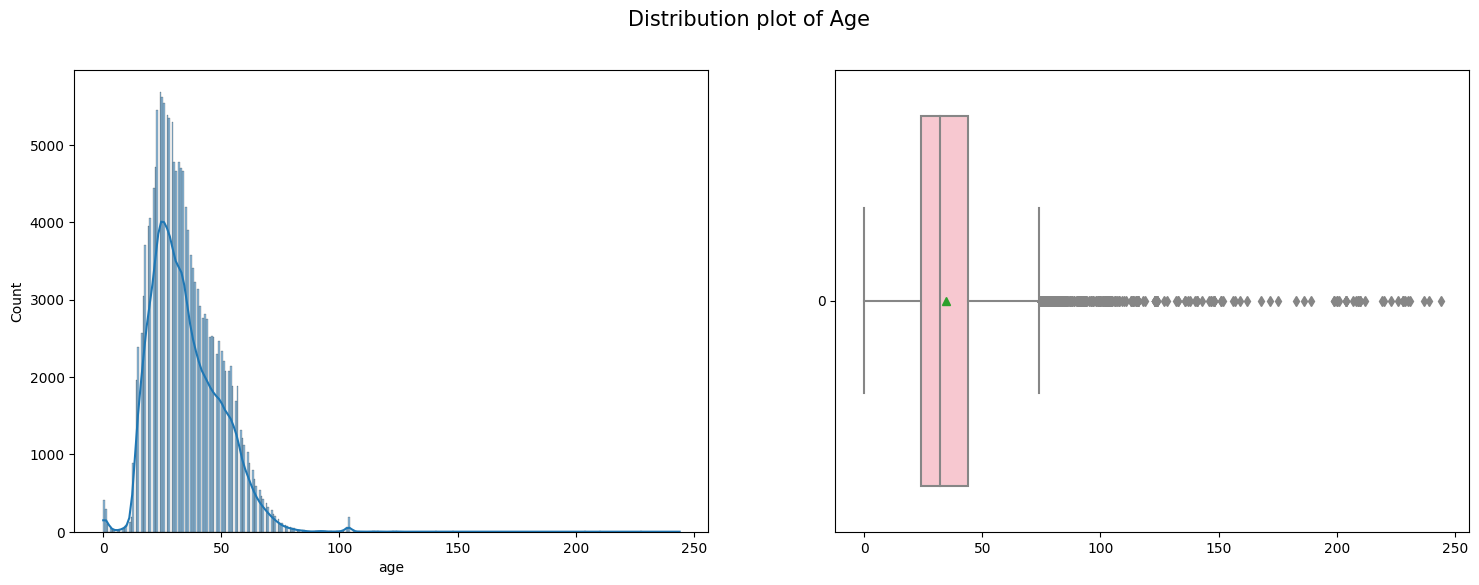

In [ ]:
# Age Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(users['age'], ax = axes[0],kde = True)
sns.boxplot(users['age'], ax = axes[1],orient='h',showmeans=True,color='pink')
fig.suptitle("Distribution plot of Age", fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2 - Book Rating Distribution

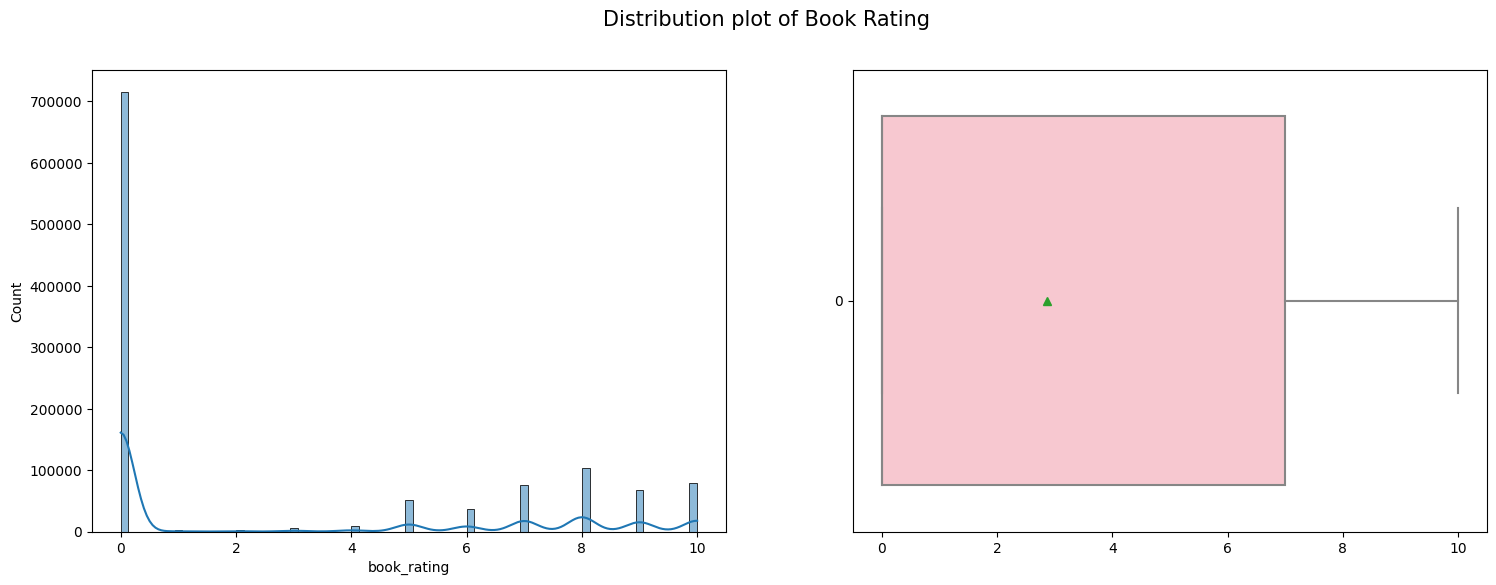

In [ ]:
# Rating Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(ratings['book_rating'], ax = axes[0],kde = True)
sns.boxplot(ratings['book_rating'], ax = axes[1], orient='h',showmeans=True,color='pink')
fig.suptitle("Distribution plot of Book Rating", fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3 - Explicit Ratings

In [ ]:
explicit = ratings[ratings['book_rating']!=0]

In [ ]:
plt.show()

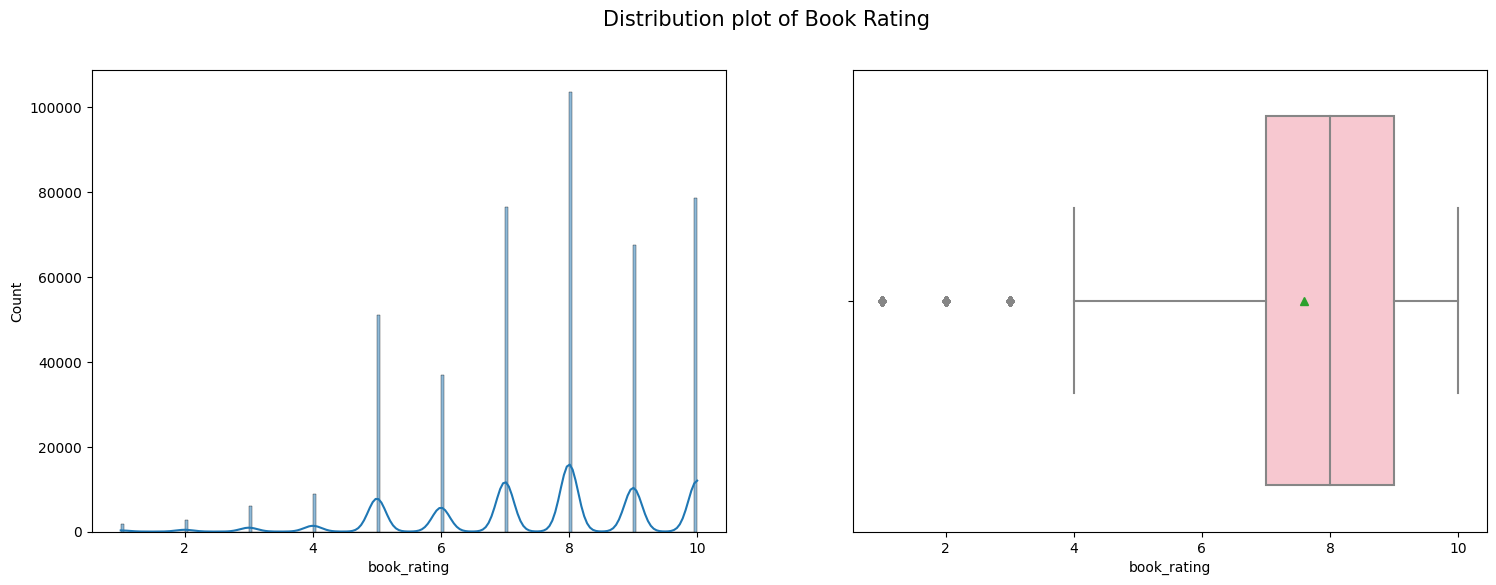

In [ ]:
# Explicit Rating Distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.histplot(explicit['book_rating'], ax = axes[0],kde = True)
sns.boxplot(x=explicit['book_rating'], ax = axes[1], orient='h', showmeans=True, color='pink')
fig.suptitle("Distribution plot of Book Rating", fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4 - Year of Publication

In [ ]:
year = books['year_of_publication'].value_counts().reset_index()
year.columns = ['year', 'count']
year = year.sort_values(by='count', ascending=False).head(15)
year['year']='Year '+year['year'].astype(int).astype(str)

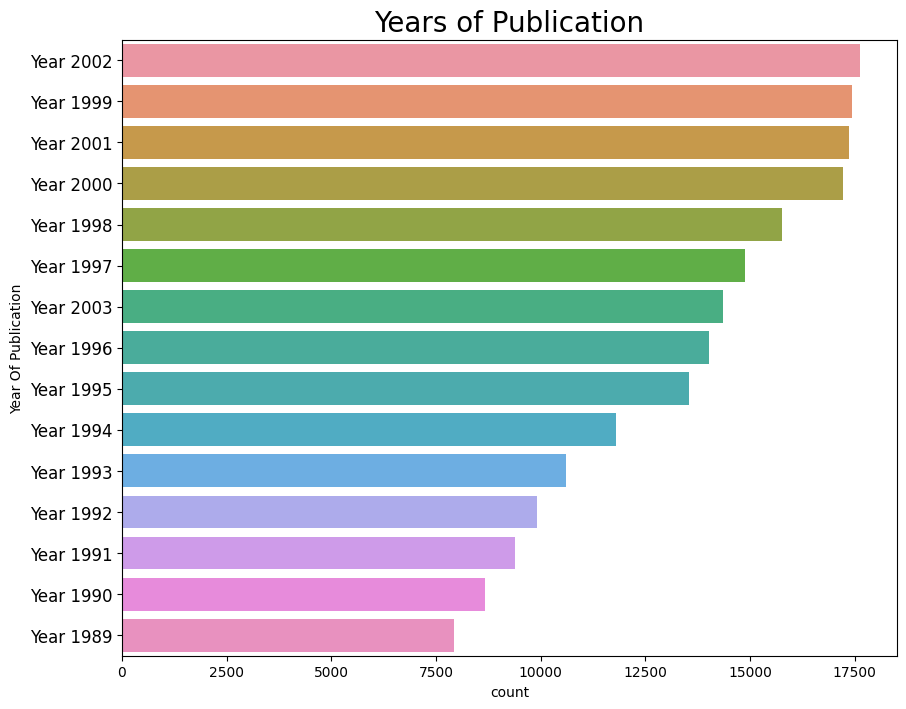

In [ ]:
# Year of publication
plt.figure(figsize=(10,8))
sns.barplot(x='count',y='year',data=year, orient = 'h')
plt.ylabel('Year Of Publication')
plt.yticks(size=12)
plt.title('Years of Publication',size=20)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Function for bar plot

In [ ]:
def bar_plot(df,col,label):
    plot_df = df[col].value_counts().head(15).reset_index()
    plot_df.columns=[col,'count']

    plt.figure(figsize=(10,8))
    sns.barplot(x='count',y=col,data=plot_df)
    plt.ylabel(label)
    plt.title(label,size=20)
    plt.show()

#### Chart - 5 - Top Book Title

In [ ]:
data_2[data_2['book_title']=='Wild Animus']['book_title'].count()

365

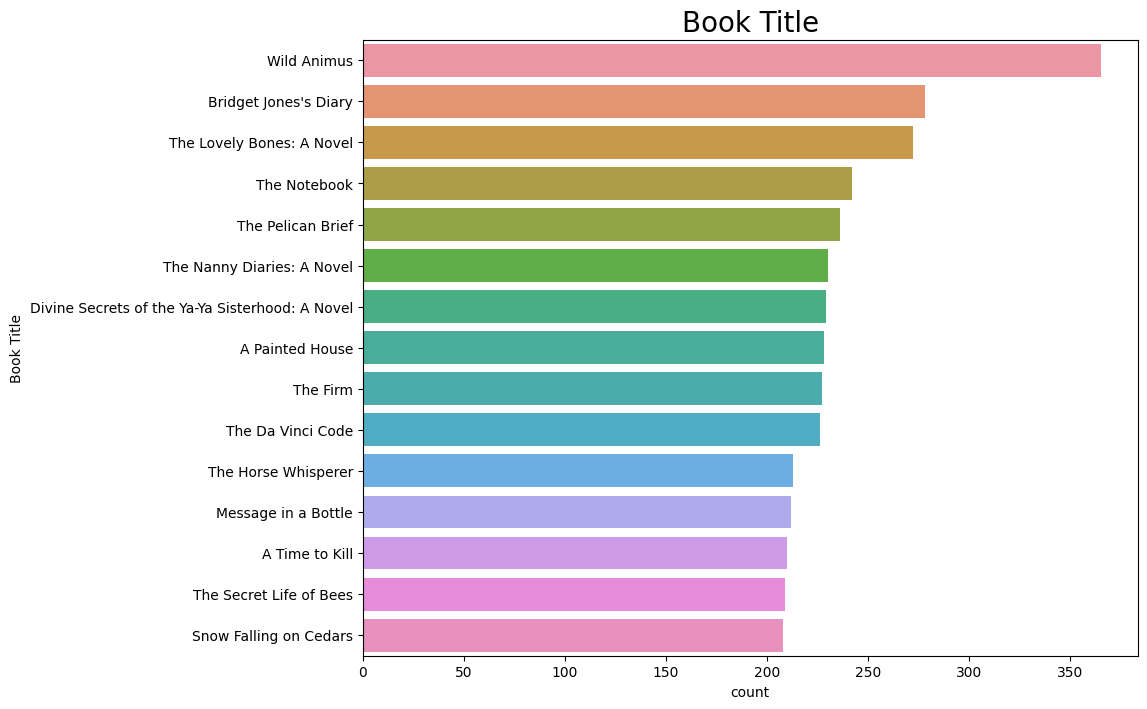

In [ ]:
# Top books by number of ratings
bar_plot(data_2, 'book_title', 'Book Title')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 - Top Book Author

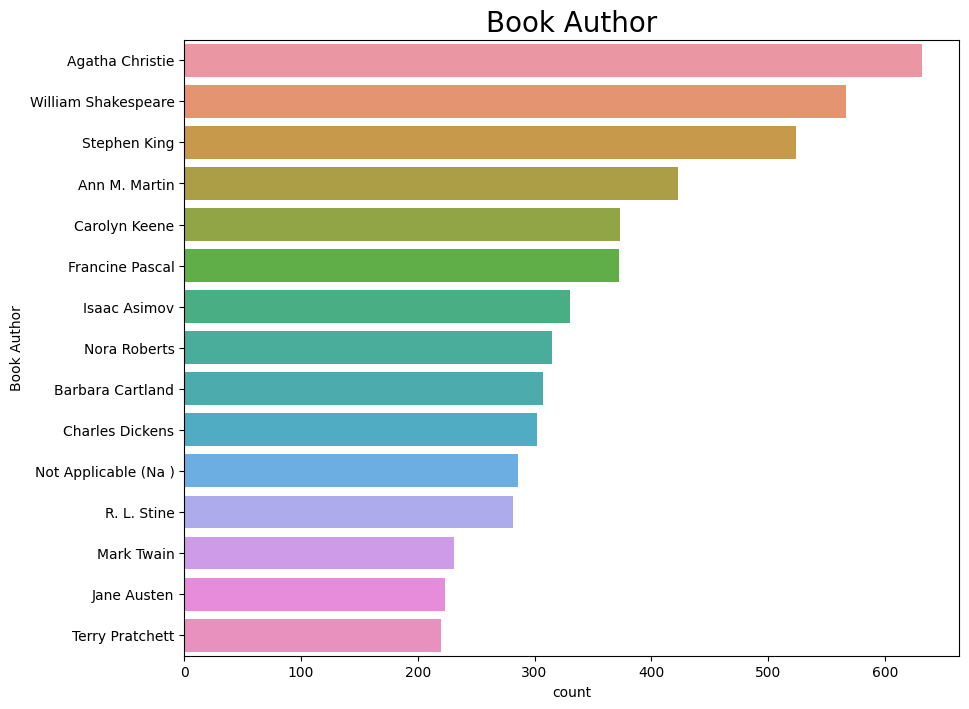

In [ ]:
# Plot of book author based on number of books
bar_plot(books, 'book_author', 'Book Author')

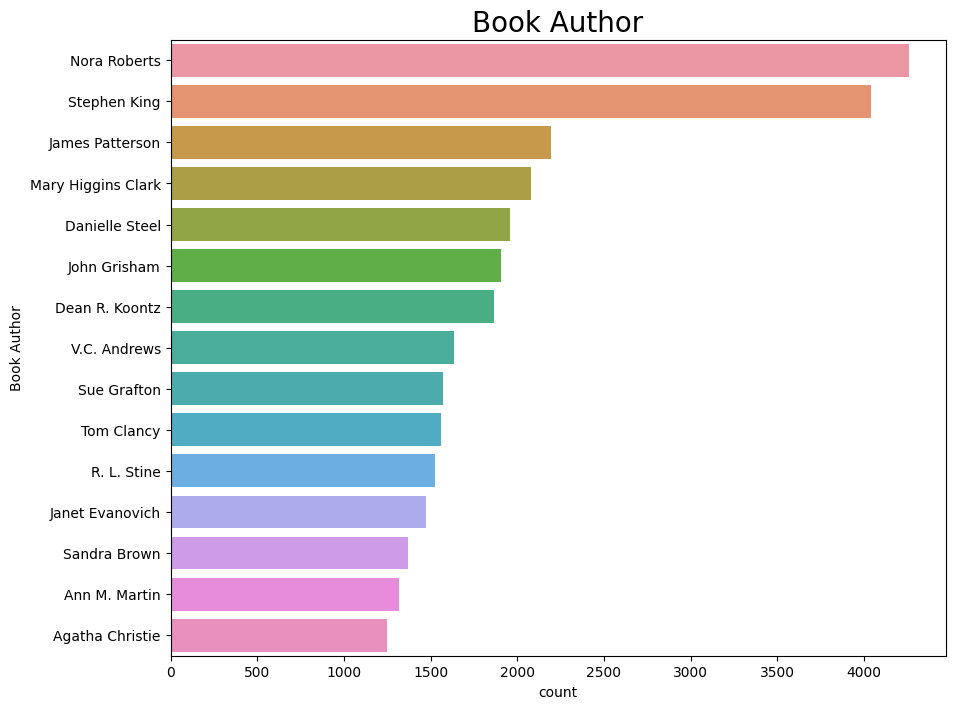

In [ ]:
# Plot of book author based on number of reviews
bar_plot(data_2, 'book_author', 'Book Author')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Book Publisher

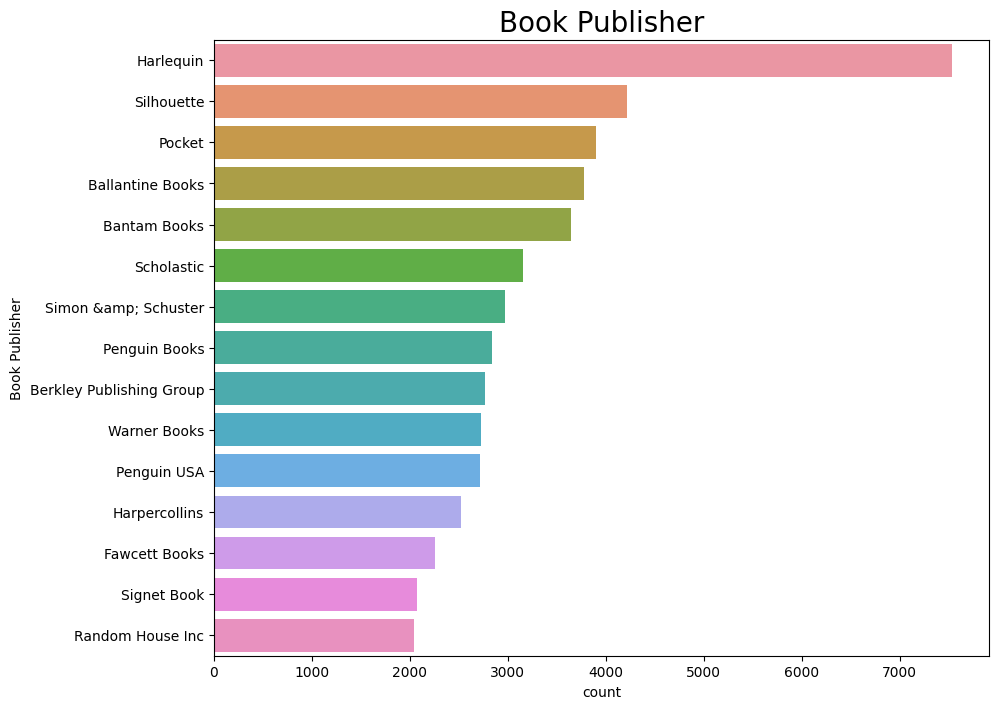

In [ ]:
# plot of book publishers based on number of books
bar_plot(books, 'publisher', 'Book Publisher')

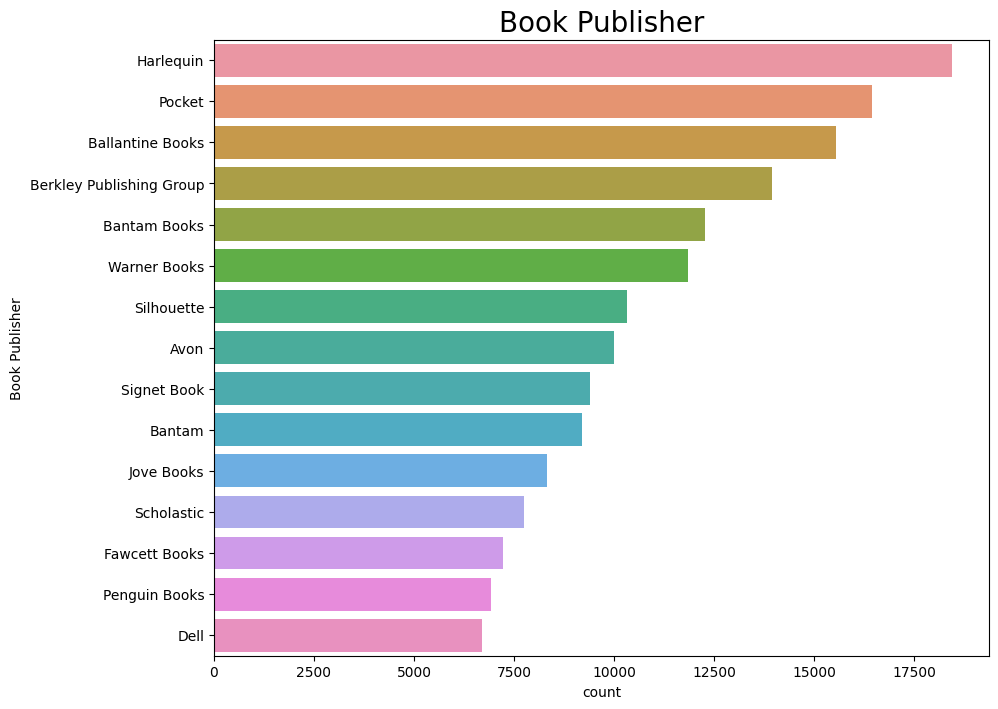

In [ ]:
# plot of book publishers based on number of reviews
bar_plot(data_2, 'publisher', 'Book Publisher')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8 - Top Countries

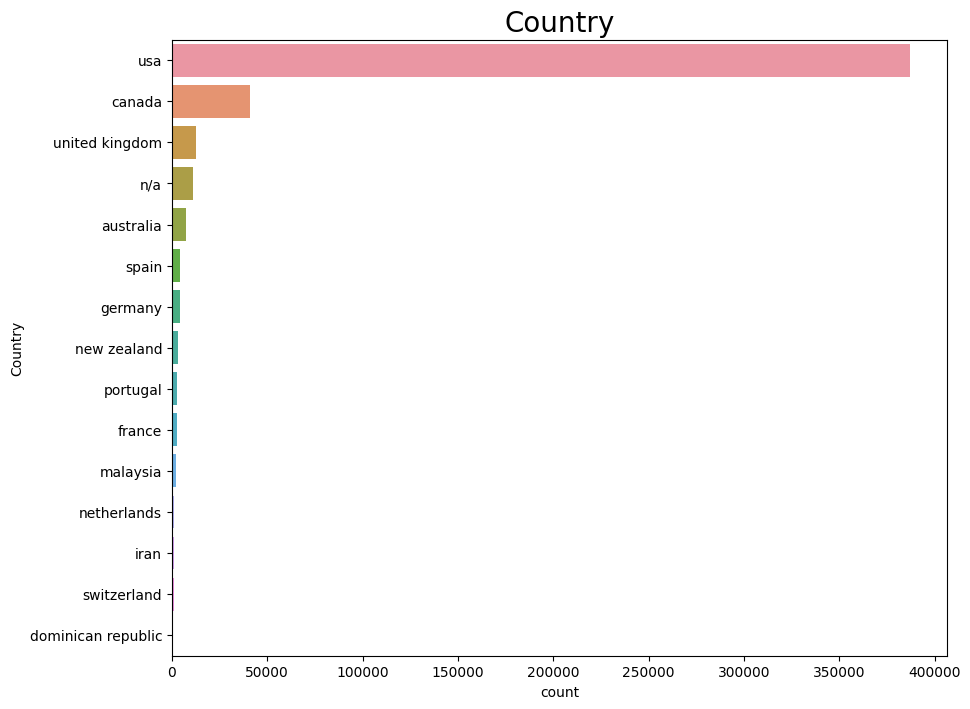

In [ ]:
# Top 10 books by number of books
bar_plot(data_2, 'country', 'Country')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr = data_2.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - Pair Plot 

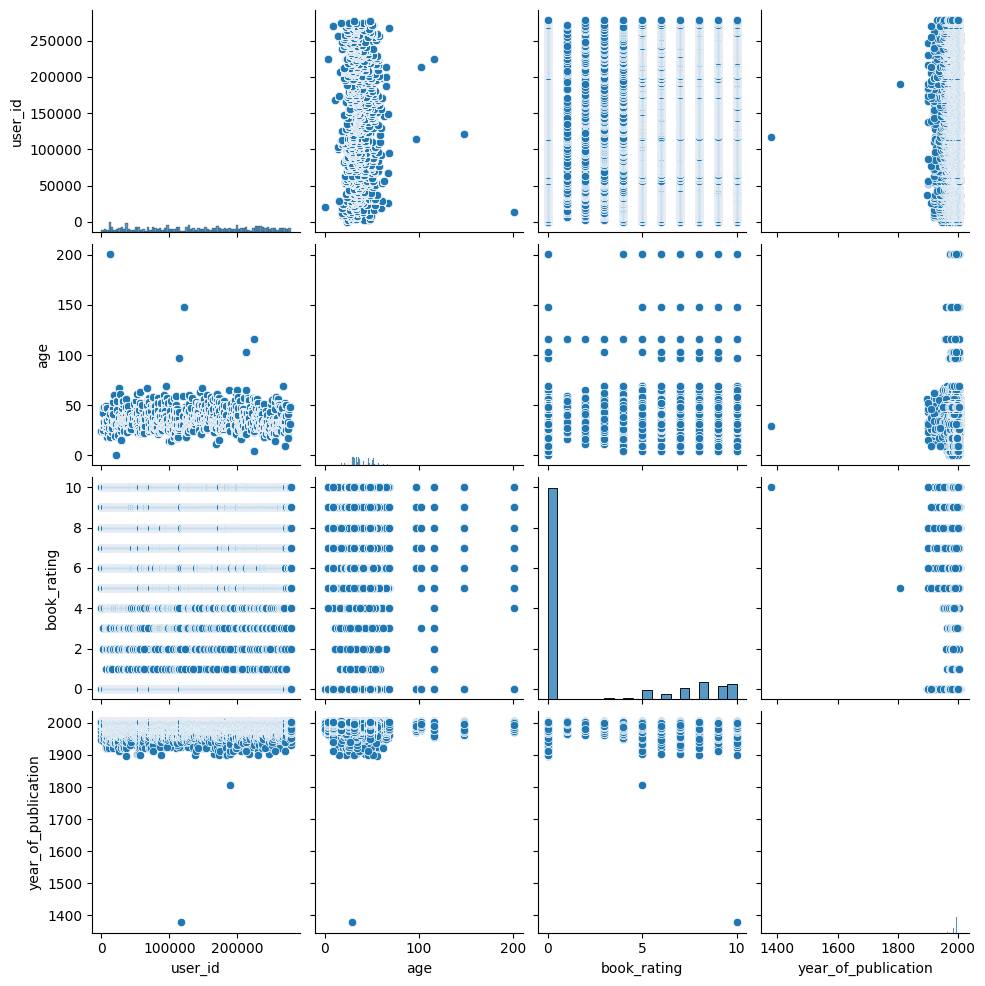

In [ ]:
# Pair Plot
sns.pairplot(data_2)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values and Outliers

In [ ]:
missing_values(data_2)

#### Handling Age Column

In [ ]:
# outlier data became NaN
data_2.loc[(data_2.age > 100) | (data_2.age < 5), 'age'] = np.nan

In [ ]:
missing_values(data_2)

In [ ]:
# filling the age as per the median value of country
data_2['age'] = data_2['age'].fillna(data_2.groupby('country')['age'].transform('median'))

In [ ]:
missing_values(data_2)

In [ ]:
data_2['age'].fillna(data_2.age.mean(),inplace=True)

In [ ]:
missing_values(data_2)

#### Handling year_of_publication and other missing values

In [ ]:
#replacing NaN with median value of Year-Of-Publication
data_2['year_of_publication'].fillna(round(books['year_of_publication'].median()), inplace=True)

In [ ]:
# Replacing remaining values with other for all eht remaining columns
data_2.fillna('other', inplace=True)

In [ ]:
missing_values(data_2)

In [ ]:
data_2.head()

#### Considering only Explicit Ratings

In [ ]:
final_df = data_2[data_2['book_rating']!=0]

In [ ]:
final_df['avg_rating']=final_df.groupby('isbn')['book_rating'].transform('mean')

In [ ]:
final_df.head()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
final_df.shape

(383842, 12)

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***